<h1 style="font-size: 40px; margin-bottom: 0px;">10.2 RNA-seq counts</h1>

<hr style="margin-left: 0px; border: 0.25px solid; border-color: #000000; width: 600px;"></hr>

Yesterday, we aligned our RNA-seq reads to a reference genome using the splice aware aligner HISAT2, and today, we'll be counting our mapped reads in order to set up for differential expression analysis. To do this, we'll make use of a program called HTSeq, which will allow us to count the reads mapped to different genomic features, and in the case of RNA-seq, we're interested in counting reads that have mapped to exons. Each group will then obtain raw counts for their control and TAZ KO replicates. We'll take a look at the data in our Python notebooks to do some basic QC, and then take a look to see if we might have some potentially differentially expressed genes just solely based on one replicate.

<strong>Learning objectives:</strong>

<ul>
    <li>Install and use HTSeq to obtain read counts</li>
    <li>Understand and play with HTSeq output</li>
    <li>Manual analysis to visualize raw count data for a single replicate</li>
</ul>

<h1 style="font-size: 40px; margin-bottom: 0px;">HTSeq</h1>

<hr style="margin-left: 0px; border: 0.25px solid; border-color: #000000; width: 400px;"></hr>

<a href="https://htseq.readthedocs.io/en/master/index.html" rel="noopener noreferrer" target="_blank"><u>Documentation for HTSeq is here.</u></a>

HTSeq (High-throughput sequence analysis in Python) is developed by Fabio Zanini, Simon Anders, Givanna Putri and contributors (<a href="https://academic.oup.com/bioinformatics/article/38/10/2943/6551247" rel="noopener noreferrer" target="_blank"><u>Anders et al 2014</u></a>, <a href="https://academic.oup.com/bioinformatics/article/31/2/166/2366196" rel="noopener noreferrer" target="_blank"><u>Putri et al 2022</u></a>). It's a Python package that acts as a framework for working with high-throughput sequencing data in Python. We will make use of its ability to count reads within features when provided with an alignment file and with a genome annotation file. For this, we'll make use of Terminal to install and run HTSeq, then we'll use this Python notebook to play around with the outputs that we get.

<h2>Install HTSeq</h2>

To install the HTSeq package, first open up Terminal. Then install HTSeq by entering the following into the command line:

<pre style="width: 350px; margin-top: 15px; margin-bottom: 15px; color: #000000; background-color: #EEEEEE; border: 1px solid; border-color: #AAAAAA; padding: 10px; border-radius: 15px; font-size: 12px;">pip install HTSeq</pre>

The HTSeq package should then be installed, and you will be able to use the information contained within your alignment files and obtain the raw counts for specific genomic features. As Dr. Ingolia mentioned in lecture, genomic features are usually annotated in a GFF or GTF format, which is a fairly large tab-delimited table containing the following information for each annotated genomic feature:

<table style="text-align: center;">
    <tr style="font-size: 15px;">
        <th>seqname</th>
        <th>source</th>
        <th>feature</th>
        <th>start</th>
        <th>end</th>
        <th>score</th>
        <th>strand</th>
        <th>frame</th>
        <th>attribute</th>
    </tr>
    <tr>
        <td>Chr name</td>
        <td>Program that generated the data or the data source</td>
        <td>type of feature (gene, exon, cds, etc)</td>
        <td>start position</td>
        <td>end position</td>
        <td>floating point value</td>
        <td>+ or -</td>
        <td>codon frame</td>
        <td>additional information for each feature</td>
    </tr>
</table>

For this part, let's take a look at our annotation file in notebook 10_2a. The GTF file is quite large, so we'll open it up in another notebook, so we can close it out later and free up memory.

<h2>Run <code>htseq-count</code> to obtain raw counts</h2>

One of the main things you can do with HTSeq is to determine how many reads overlap with a specific set of genomic features. For example, you can count the reads that overlap with exons in order to begin estimating the levels of gene expression in your cell. HTSeq contains a specific script that performs read quantification with the intention that you will later perform differential expression analysis. You can use the command <code>htseq-count</code> to take a gene annotation file and an alignment file and quantify how many reads map to each annotated gene.

<a href="https://htseq.readthedocs.io/en/master/htseqcount.html" rel="noopener noreferrer" target="_blank"><u>Documentation specifically for htseq-count is here.</u></a>

The basic setup for using <code>htseq-count</code> is:

<pre style="width: 450px; margin-top: 15px; margin-bottom: 15px; color: #000000; background-color: #EEEEEE; border: 1px solid; border-color: #AAAAAA; padding: 10px; border-radius: 15px; font-size: 12px;">htseq-count &lbrack;options&rbrack; &lt;alignment_files&gt; &lt;gtf_file&gt;</pre>

Based on the basic setup, we can run <code>htseq-count</code> on our two samples at once by supplying it with both your control replicate and your TAZ KO replicate. To do this easily, we can make use of the wildcard <code>*</code> to pull just our bam files that were sorted by name.

Something to note is that if you look into the documentation for <code>htseq-count</code>, you'll notice that special consideration needs to be taken for paired-end reads. The documentation recommends that the files be sorted by name rather than position, such that mate pairs are positioned by each other to help save memory usage since reads are kept in memory until their mate is found.

<hr style="border: 1px solid; border-color: #BBBBBB;"></hr>

So, to get the raw counts of both our alignment files

<pre style="width: 500px; margin-top: 15px; margin-bottom: 15px; color: #000000; background-color: #EEEEEE; border: 1px solid; border-color: #AAAAAA; padding: 10px; border-radius: 15px; font-size: 12px;">htseq-count \
-t exon \
-i gene_id \
-r name \
-s reverse \
-f bam \
./alignment-outputs/bams/*_name.bam \
~/shared/course/mcb201b-shared-readwrite/rna-feature/hg19-refseq.gtf \
> ./1M_g1_counts.txt</pre>

Let's break down the code:

<code>htseq-count</code>

This is to call up the script to get the counts of reads mapped to a set of genomic features.

<hr style="border: 1px solid; border-color: #AAAAAA;"></hr>

<code>-t exon</code>

The <code>-t</code> option allows us to specify what type of feature from the <strong>feature</strong> column of the GTF file that we want to obtain read counts for. In this setup, we are looking to determine how many reads overlap with annotated exons.

<hr style="border: 1px solid; border-color: #AAAAAA;"></hr>

<code>-i gene_id</code>

The <code>-i</code> option provides the labels for each exon that we determine the counts for. Here, we specify that we want it to pull the <strong>gene_id</strong>, and use it as the label for its respective exon.

<hr style="border: 1px solid; border-color: #AAAAAA;"></hr>

<code>-r name</code>

Here, we specify that our BAM file reads are sorted by name.

<hr style="border: 1px solid; border-color: #AAAAAA;"></hr>

<code>-s reverse</code>

This option tells <code>htseq-count</code> the strandedness of your cDNA library, and it's an important option because it will have a noticeable impact on the raw counts that you get. If you select the incorrect strandedness, you will end up with inaccurate quantifications that will impact your differential expression analysis. 

Since our cDNA library is directional on the first strand, so we will need to specify <code>reverse</code> for the strandedness option.

<hr style="border: 1px solid; border-color: #AAAAAA;"></hr>

<code>-f bam</code>

We provide the information on the type of alignment file that we are using as the input(s). Our alignment files are BAMs, so we specify <code>bam</code>.

<hr style="border: 1px solid; border-color: #AAAAAA;"></hr>

<code>./alignment-outputs/bams/*_name.bam</code>

After we specify our options, we then provide the alignment files that we want to obtain read counts for. Here, we can provide it with our alignment files by making use of the wildcard <code>*</code>.

<hr style="border: 1px solid; border-color: #AAAAAA;"></hr>

<code>~/shared/course/mcb201b-shared-readwrite/rna-feature/hg19-refseq.gtf</code>

Then we specify the annotation file that we want it to use in order to identify how many reads are overlapping with known genomic features. In our case, we provide it with a file containing gene annotations.

<hr style="border: 1px solid; border-color: #AAAAAA;"></hr>

<code>&gt; ./1M_g1_counts.txt</code>

We then tell it to redirect the output to a <code>.txt</code> file that we can then play around with later and use for differential expression analysis.


<h1 style="font-size: 40px; margin-bottom: 0px;">Import raw counts data matrix</h1>

<hr style="margin-left: 0px; border: 0.25px solid; border-color: #000000; width: 600px;"></hr>

Since we provided <code>htseq-count</code> with two BAM files at once, it will provide us with a data matrix containing the read counts for both our control and TAZ KO samples.

The first column should contain the <code>gene_id</code> that we instructed <code>htseq-count</code> to use to identify each feature. So we'll have the gene symbols in the first column. The second column should contain your raw counts for your control sample and the third column should contain your raw counts for your TAZ KO sample.

Let's import our data matrix into this Python notebook as a pandas DataFrame and play around with our data.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import seaborn as sns

<h2>Exercise #1: Import your counts matrix</h2>

Import the count matrix that you got for your control and TAZ KO samples. <a href="https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html" rel="noopener noreferrer" target="_blank"><u>Take a look over the documentation for <code>pd.read_csv()</code></u></a> to see if you can import your tab-delimited data matrix with the header names as: 'gene', 'ctrl', and 'tazko'.

In [2]:
counts = pd.read_csv('1M_g1_counts.txt',
                     delimiter='\t',
                     names=['gene', 
                            'ctrl',
                            'tazko'
                           ]
                    )

Now let's take a look at the first ten rows of our DataFrame.

In [3]:
counts.head(10).style

,gene,ctrl,tazko
0,A1BG,0,2
1,A1BG-AS1,3,2
2,A1CF,0,0
3,A2M,0,0
4,A2M-AS1,0,0
5,A2ML1,0,0
6,A2MP1,0,0
7,A3GALT2,0,0
8,A4GALT,12,9
9,A4GNT,0,0


There's also additional information about our counts at the last set of rows, so let's take a look at the last ten rows as well.

In [4]:
counts.tail(10).style

,gene,ctrl,tazko
43677,ZYX,117,132
43678,ZYXP1,0,0
43679,ZZEF1,32,36
43680,ZZZ3,120,86
43681,bA255A11.4,0,0
43682,__no_feature,87759,92139
43683,__ambiguous,21083,25221
43684,__too_low_aQual,49081,54909
43685,__not_aligned,60572,33600
43686,__alignment_not_unique,42860,46764


So not only do we have the raw counts for each annotated gene, we also have rows at the end of the data matrix that specify:

<ul>
    <li><code>__no_feature</code>: the number of reads that did not overlap with any annotated feature</li>
    <li><code>__ambiguous</code>: those that overlapped with two or more genes</li>
    <li><code>__too_low_aQual</code>: those that had poor alignment quality</li>
    <li><code>__not_aligned</code>: those that didn't align</li>
    <li><code>__alignment_not_unique</code>: reads that mapped to more than one location</li>
</ul>

These rows give us some information that we can use for QC to see if anything might have went wrong in the read counting. For example, if we specified the incorrect strandedness of our cDNA library, we will end up with an unusually large portion of our reads not overlapping with any genes because they'll be associated with the wrong strand.

<h2>Exercise #2: Pull out information to perform QC</h2>

We can take a look at our overall count statistics by pulling the rows starting with the string <code>__</code> from our DataFrame by using the <code>pd.Series.str.contains()</code> function. 

<a href="https://pandas.pydata.org/docs/reference/api/pandas.Series.str.contains.html" rel="noopener noreferrer" target="_blank"><u>Documentation is here.</u></a>

See if you can take a look at the documentation to try and pull the rows starting with <code>__</code> and save it as a new variable called <code>read_stats</code>. We'll then concatenate the total reads that were actually counted after.

In [5]:
print(counts['gene'].str.contains('__'))

0        False
1        False
2        False
3        False
4        False
         ...  
43682     True
43683     True
43684     True
43685     True
43686     True
Name: gene, Length: 43687, dtype: bool


In [6]:
read_stats = counts[counts['gene'].str.contains('__')]

In [7]:
read_stats

,gene,ctrl,tazko
43682,__no_feature,87759,92139
43683,__ambiguous,21083,25221
43684,__too_low_aQual,49081,54909
43685,__not_aligned,60572,33600
43686,__alignment_not_unique,42860,46764


<h2>Guided Exercise: Determine how many reads overlap with an annotated genes</h2>

So we've pulled the reads that were not associated with any annotated genes in our GTF file, so the reads that were counted are the remaining rows. In other words, the inverse of the rows containing the string <code>__</code> contain the reads that were counted. We can continue to make use of the <code>pd.Series.str.contains()</code> function, but we can add on an additional <code>~</code> in order to specify that we want the inverse. 

How this will look is:

```
counted_reads = counts[~counts['gene'].str.contains('__')]
```

Then to determine the total counts of those reads, we can make use of the <code>pd.DataFrame.sum()</code> function, and we can combine the two into a single line of code. So we end up with:

```
counted_reads = counts[~counts['gene'].str.contains('__')].sum(axis=0, numeric_only=True)
```

Breaking down this line of code, we get:

<code>counted_reads</code>

This is the variable that we will assign our total counted read counts to.

<hr style="border: 1px solid; border-color: #AAAAAA;"></hr>

<code>=</code>

This is the assignment operator.

<hr style="border: 1px solid; border-color: #AAAAAA;"></hr>

<code>counts[~counts['gene'].str.contains('__')]</code>

Here, we specify that we want the rows that <u>do not</u> contain the string <code>__</code>, which corresponds to all the reads that were counted as overlapping with an annotated gene.

<hr style="border: 1px solid; border-color: #AAAAAA;"></hr>

<code>.sum(axis=0, numeric_only=True)</code>

This function allows us to take the sum of the ctrl column's read counts and the sum of the tazko column's read counts, so we have a Series with the total counted reads for our two samples.

In [8]:
counted_reads = counts[~counts['gene'].str.contains('__')].sum(axis=0, numeric_only=True)

In [9]:
counted_reads

ctrl     738645
tazko    747367
dtype: int64

<h2>Guided Exercise: Prepare <code>counted_reads</code> for concatenation</h2>

There's two things we'll need to consider in order to get our <code>counted_reads</code> ready to be concatenated onto our <code>read_stats</code> DataFrame. 

First, we need a label for it contained in the "gene" column like for our <code>read_stats</code> DataFrame.

Second, it's a Series with the indices corresponding to the column headers in the <code>read_stats</code> DataFrame.

To address the first consideration, we can just concatenate two Series together in order to add in a label in the "gene" column using the <code>pd.concat()</code> function.

```
counted_reads = pd.concat([pd.Series({'gene': 'counted_reads'}), counted_reads])
```

In [10]:
counted_reads = pd.concat([pd.Series({'gene': 'counted_reads'}), counted_reads])

In [11]:
counted_reads

gene     counted_reads
ctrl            738645
tazko           747367
dtype: object

Another way of seeing the second consideration is that <code>counted_reads</code> is in the wrong orientation, where its rows should be columns and its columns should be rows. So to address this, we will first need to convert it into a DataFrame, because pandas Series is one-dimensional, so it cannot be transposed. We'll make use of the <code>pd.Series.to_frame()</code> function first to make our Series a DataFrame.

```
counted_reads = counted_reads.to_frame()
```

Then, we can use the <code>pd.DataFrame.transpose()</code> or the <code>pd.DataFrame.T</code> functions to transpose our DataFrame. We can combine this with the DataFrame conversion do it all in a single line as follows:

```
counted_reads = counted_reads.to_frame().transpose()
```

In [12]:
counted_reads = counted_reads.to_frame().transpose()

In [13]:
counted_reads

,gene,ctrl,tazko
0,counted_reads,738645,747367


<h2>Exercise #3: Concatenate <code>read_stats</code> and <code>counted_reads</code></h2>

Now it's ready to be concatenated, so we can make use of the <code>pd.concat()</code> function again.

In [14]:
read_stats = pd.concat([read_stats, counted_reads], ignore_index=True)

In [15]:
read_stats

,gene,ctrl,tazko
0,__no_feature,87759,92139
1,__ambiguous,21083,25221
2,__too_low_aQual,49081,54909
3,__not_aligned,60572,33600
4,__alignment_not_unique,42860,46764
5,counted_reads,738645,747367


<h2>Exercise #4: Update labels in <code>gene</code> column to remove the starting <code>__</code></h2>

So here, we can just rename the labels to remove the starting two underscores <code>__</code>. Otherwise, when we try to use them as labels for our plots, Python will ignore them.

In [16]:
read_stats['gene'] = ['no_feature',
                      'ambiguous',
                      'low_alignQ',
                      'not_aligned',
                      'not_unique',
                      'counted_reads'
                     ]

In [17]:
read_stats

,gene,ctrl,tazko
0,no_feature,87759,92139
1,ambiguous,21083,25221
2,low_alignQ,49081,54909
3,not_aligned,60572,33600
4,not_unique,42860,46764
5,counted_reads,738645,747367


<h2>Guided Exercise: Generate a stacked bar plot on count statistics</h2>

Now let's use that DataFrame to generate a stacked bar plot to obtain our count statistics, so we can do some QC following <code>htseq-counts</code>. If our two samples have dramatically different proportions of reads that were counted, then we'll need to keep that in mind in our later downstream analyses.

<h3>Set the <code>gene</code> column as the index</h3>

To simplify the later plotting, we'll use the labels in the <code>gene</code> column as our indices, so the body of the DataFrame only contains numerical values.

In [18]:
read_stats = read_stats.set_index('gene')

In [19]:
read_stats

,ctrl,tazko
gene,,
no_feature,87759,92139
ambiguous,21083,25221
low_alignQ,49081,54909
not_aligned,60572,33600
not_unique,42860,46764
counted_reads,738645,747367


<h3>Transpose DataFrame</h3>

We'll now transpose our DataFrame to make it easier to plot a stacked bar plot using a for loop.

In [20]:
read_stats = read_stats.transpose()

In [21]:
read_stats

gene,no_feature,ambiguous,low_alignQ,not_aligned,not_unique,counted_reads
ctrl,87759,21083,49081,60572,42860,738645
tazko,92139,25221,54909,33600,46764,747367


<h3>Plot count statistics for control and TAZ KO</h3>

Now our DataFrame is ready to use for plotting, so we can prepare to set up a for loop to plot a stacked bar plot.

Seaborn doesn't have the ability to make a stacked bar plot, but matplotlib can through its <code>plt.bar()</code> function by specifying an additional <code>bottom</code> parameter. This will plot the bottom of a bar plot higher up at the specified Y-axis height, allowing us to stack our bars one on top of another.

We can go into <a href="https://matplotlib.org/stable/gallery/lines_bars_and_markers/bar_stacked.html" rel="noopener noreferrer" target="_blank"><u>the documentation for matplotlib</u></a> and find that they describe a way to plot stacked bar plots using the <code>plt.bar()</code> function and a for loop. So let's set something similar up for our count statistics.

In [22]:
print(read_stats.columns[::-1])

Index(['counted_reads', 'not_unique', 'not_aligned', 'low_alignQ', 'ambiguous',
       'no_feature'],
      dtype='object', name='gene')


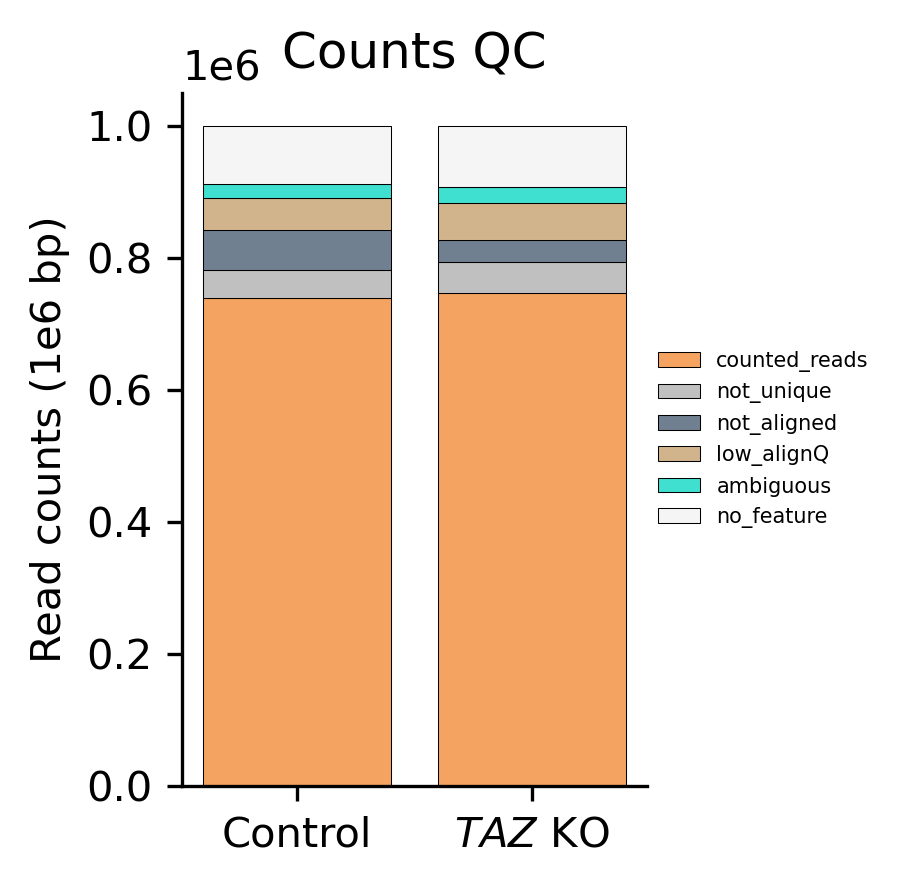

In [23]:
#First set up your subplots
fig, ax = plt.subplots()

#Define what our x-axis is going to be - in our case it's either ctrl or tazko
x=read_stats.index

#Define what our y-axis is going to be - in our case it's our column headers
y=read_stats.columns[::-1]

#Set up an array of zeros to hold data for our for loop
bottom=np.zeros(len(x))

#Set up a lazy way to pick colors since we don't care too much about the number of colors we need
use_color=pd.Series(mcolors.CSS4_COLORS)

#Set up our for loop to plot a stacked bar plot
for i in np.arange(0, len(y), 1):
    #This is for plotting our stacked bar plot
    plt.bar(x,
            read_stats[y[i]],
            label=y[i],
            bottom=bottom,
            color=use_color[125+i*4],
            lw=0.25,
            edgecolor='k'
           )
    bottom += read_stats[y[i]]

#Pretty up our plots
plt.title('Counts QC')
plt.ylabel('Read counts (1e6 bp)')
plt.xticks([0,1],
           ['Control', '$TAZ$ KO']
          )
plt.legend(loc='center',
           bbox_to_anchor=(1.25,0.5),
           fontsize=5,
           edgecolor='white'
          )
sns.despine()

fig.set_dpi(300)
fig.set_size_inches(2,3)

<h1 style="font-size: 40px; margin-bottom: 0px;">Manual analysis of a single replicate</h1>

<hr style="margin-left: 0px; border: 0.25px solid; border-color: #000000; width: 700px;"></hr>

For this part, we'll go ahead and take a look at our data from our own control and TAZ KO replicates to see how they compare, and if there seems to be a potentially detectable difference between them. Additional ways of visualizing your expression data both for raw counts and also after performing normalization and/or differential expression can be found in <a href="https://academic.oup.com/bib/article/20/6/2044/5066173" rel="noopener noreferrer" target="_blank"><u>McDermaid et al 2019</u></a>.

First, we'll filter out the reads that didn't get counted, leaving us with a data matrix containing just the genes and their respective read counts. We will make use of the <code>pd.DataFrame.str.contains()</code> function again.

In [24]:
just_counts = counts[~counts['gene'].str.contains('__')]

In [26]:
just_counts.tail().style

,gene,ctrl,tazko
43677,ZYX,117,132
43678,ZYXP1,0,0
43679,ZZEF1,32,36
43680,ZZZ3,120,86
43681,bA255A11.4,0,0


<h2>Guided Exercise: Plot conditions against each other</h2>

Then, let's make a scatter plot of our read counts by plotting our two conditions against one another. The control can be plotted on the X-axis, and the TAZ KO can be plotted on the Y-axis.

<Axes: xlabel='ctrl', ylabel='tazko'>

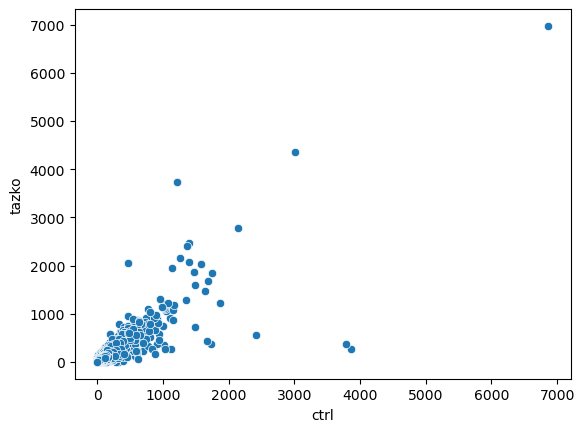

In [27]:
sns.scatterplot(x=just_counts['ctrl'],
                y=just_counts['tazko'])

We can see that there are fairly large outliers in terms of the number of reads counted for certain genes, making it difficult to compare the lower end of the data. So we can instead plot on a log scale for both the X- and the Y-axes using <code>plt.loglog()</code>. Or we can perform a log transformation on our data.

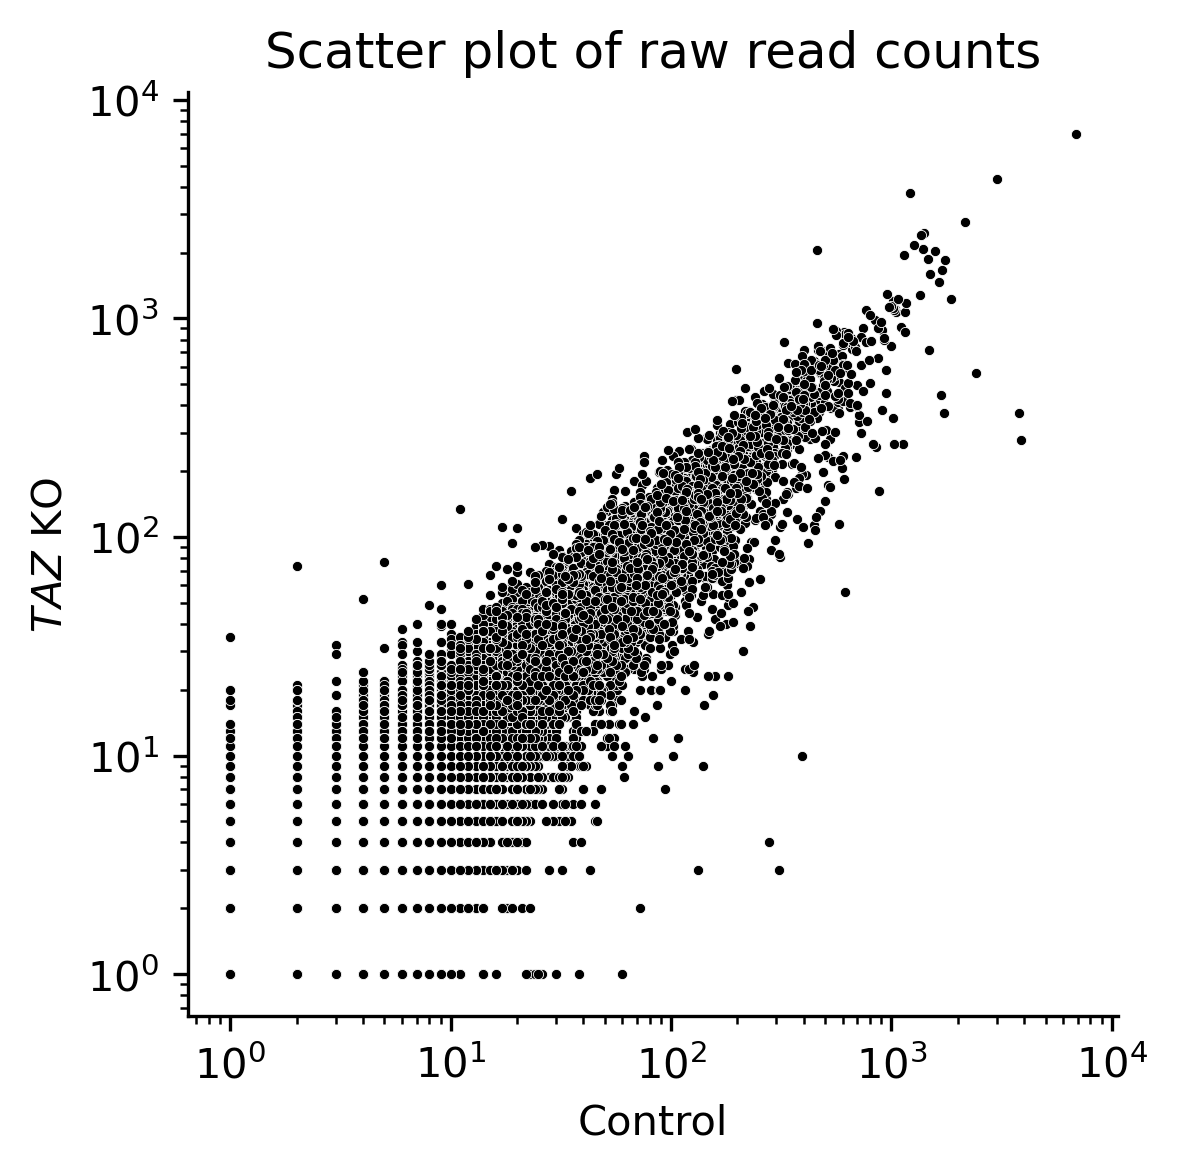

In [32]:
fig, ax = plt.subplots()

sns.scatterplot(x=just_counts['ctrl'],
                y=just_counts['tazko'],
                c='k',
                s=6
               )

plt.loglog()
plt.title('Scatter plot of raw read counts')
plt.xlabel('Control')
plt.ylabel('$TAZ$ KO')
sns.despine()

fig.set_dpi(300)
fig.set_size_inches(4,4)

Now we can see more easily a spread in our data, and each point represents an individual gene in our data matrix. Since we're plotting our control counts against our TAZ KO counts, deviations from X=Y would indicate that there is a different in the number of reads associated with that gene between the two conditions. This would suggest that there is a difference in their expression levels, and further analysis following normalization can help us determine if there is indeed differential expression.

<h2>MA plots</h2>

MA plots plot the average (A) against the ratio (M) of your dataset, and in RNA-seq, MA plots are commonly used to visualize differential expression levels. These plots have a characteristic arrowhead shape, owing to the fact that low counts lead to larger ratios. 

<h3>Get the ratio of TAZ KO to control</h3>

So to get the ratio, we can just divide our TAZ KO counts by our control counts to get a rough idea of whether there may be differences in the expression levels between our TAZ KO and control cells. 

We can then assign the resulting ratios to a new column in our DataFrame.

In [33]:
just_counts['ratio'] = just_counts['tazko'] / just_counts['ctrl']
just_counts.head().style

/tmp/ipykernel_413/3361868226.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  just_counts['ratio'] = just_counts['tazko'] / just_counts['ctrl']


,gene,ctrl,tazko,ratio
0,A1BG,0,2,inf
1,A1BG-AS1,3,2,0.666667
2,A1CF,0,0,nan
3,A2M,0,0,nan
4,A2M-AS1,0,0,nan


Since we're dividing the TAZ KO by the control, a ratio greater than 1 would indicate higher raw counts for that respective gene when TAZ is KO'ed compared to control, whereas a ratio lower than 1 would indicate the opposite. And a ratio roughly equal to 1 indicates minimal difference in expression level.

<h3>Get the average between TAZ KO and control</h3>

We can then calculate the average read count for each gene between TAZ KO and control cells, and if we want, we can filter out genes that are not expressed or too lowly expressed based on the average of the raw counts for both conditions.

In [34]:
just_counts['avg'] = (just_counts['tazko'] + just_counts['ctrl']) / 2

/tmp/ipykernel_413/566078301.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  just_counts['avg'] = (just_counts['tazko'] + just_counts['ctrl']) / 2


In [35]:
just_counts.head().style

,gene,ctrl,tazko,ratio,avg
0,A1BG,0,2,inf,1.000000
1,A1BG-AS1,3,2,0.666667,2.500000
2,A1CF,0,0,nan,0.000000
3,A2M,0,0,nan,0.000000
4,A2M-AS1,0,0,nan,0.000000


<h3>Estimate potentially downregulated and upregulated genes</h3>

With our single replicate, we take a quick look to see what genes may be upregulated or downregulated by applying a conditional statement based on the ratios.

Potentially downregulated genes would then have a ratio less than 1, and potentially upregulated genes would have a ratio greater than 1. 

So if we want to visualize how many are at least 2-fold different, we would use 0.5 and 2 as our bounds for downregulated and upregulated, respectively.

In [37]:
downreg = just_counts[(0.5 >= just_counts['ratio'])]
downreg.head().style

,gene,ctrl,tazko,ratio,avg
19,AADACP1,1,0,0.000000,0.500000
28,AARS1,253,64,0.252964,158.500000
42,ABCA10,3,0,0.000000,1.500000
45,ABCA13,1,0,0.000000,0.500000
82,ABCC9,1,0,0.000000,0.500000


In [38]:
upreg = just_counts[(2 <= just_counts['ratio'])]
upreg.head().style

,gene,ctrl,tazko,ratio,avg
0,A1BG,0,2,inf,1.000000
23,AAMDC,4,8,2.000000,6.000000
35,AASS,31,87,2.806452,59.000000
47,ABCA2,26,58,2.230769,42.000000
52,ABCA7,1,13,13.000000,7.000000


<h2>Visualize potentially downregulated and upregulated genes</h2>

Let's take the two scatter plots that we created earlier and update them to allow us to separate visually by color genes that may be upregulated and genes that may be downregulated from those that don't show that much difference between our two conditions.

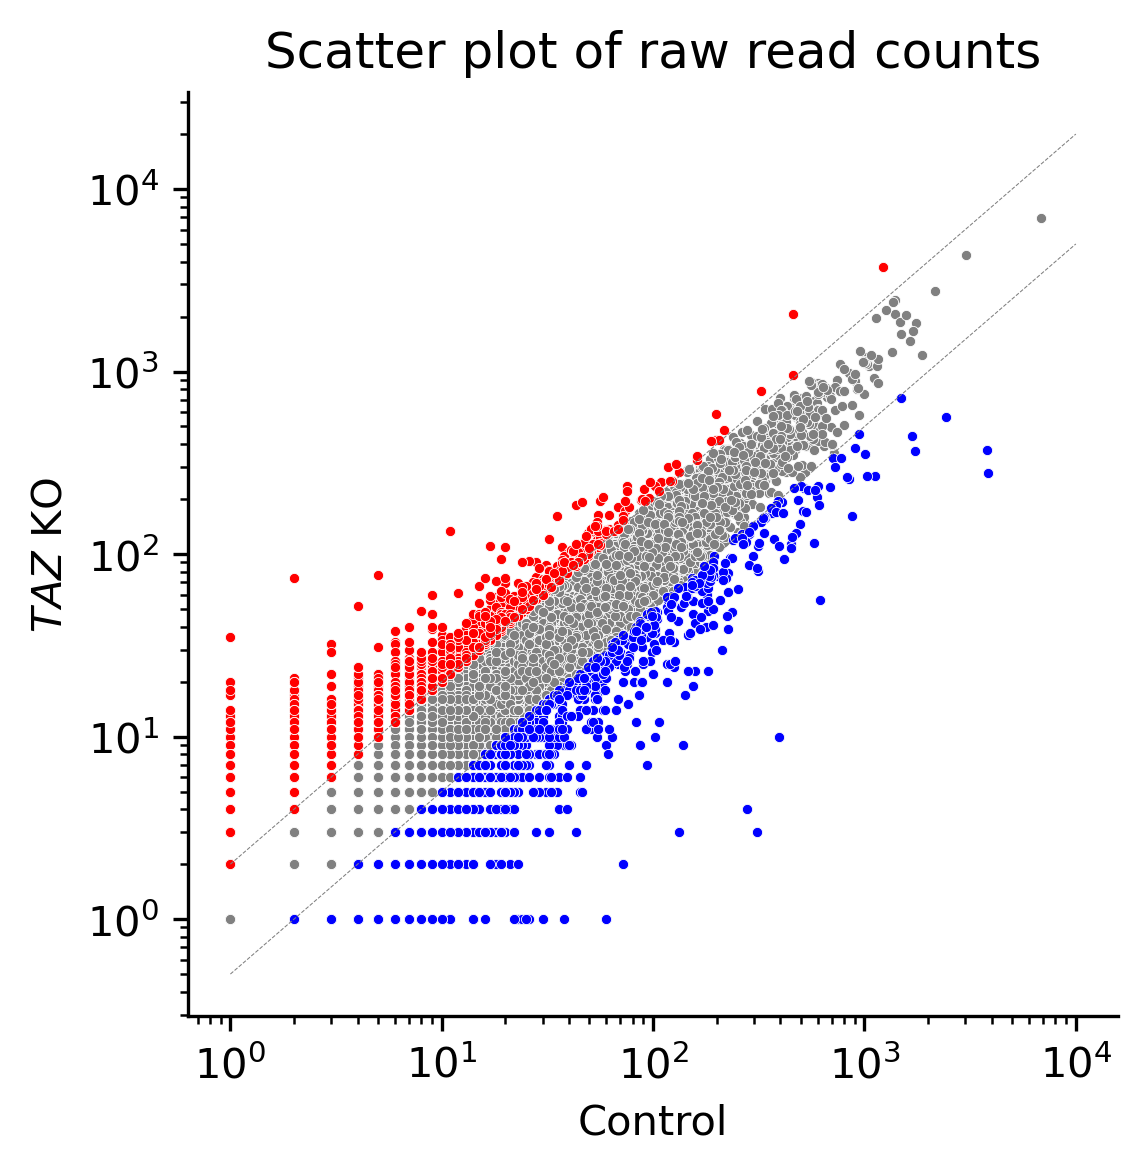

In [43]:
fig, ax = plt.subplots()

sns.lineplot(x=[1, 10000],
             y=[2, 20000],
             lw=0.25,
             ls='--',
             c='grey'
            )

sns.lineplot(x=[1, 10000],
             y=[0.5, 5000],
             lw=0.25,
             ls='--',
             c='grey'
            )

sns.scatterplot(x=just_counts['ctrl'],
                y=just_counts['tazko'],
                c='grey',
                s=6
               )

sns.scatterplot(x=upreg['ctrl'],
                y=upreg['tazko'],
                c='r',
                s=6
               )

sns.scatterplot(x=downreg['ctrl'],
                y=downreg['tazko'],
                c='b',
                s=6
               )

plt.loglog()
plt.title('Scatter plot of raw read counts')
plt.xlabel('Control')
plt.ylabel('$TAZ$ KO')
sns.despine()

fig.set_dpi(300)
fig.set_size_inches(4,4)

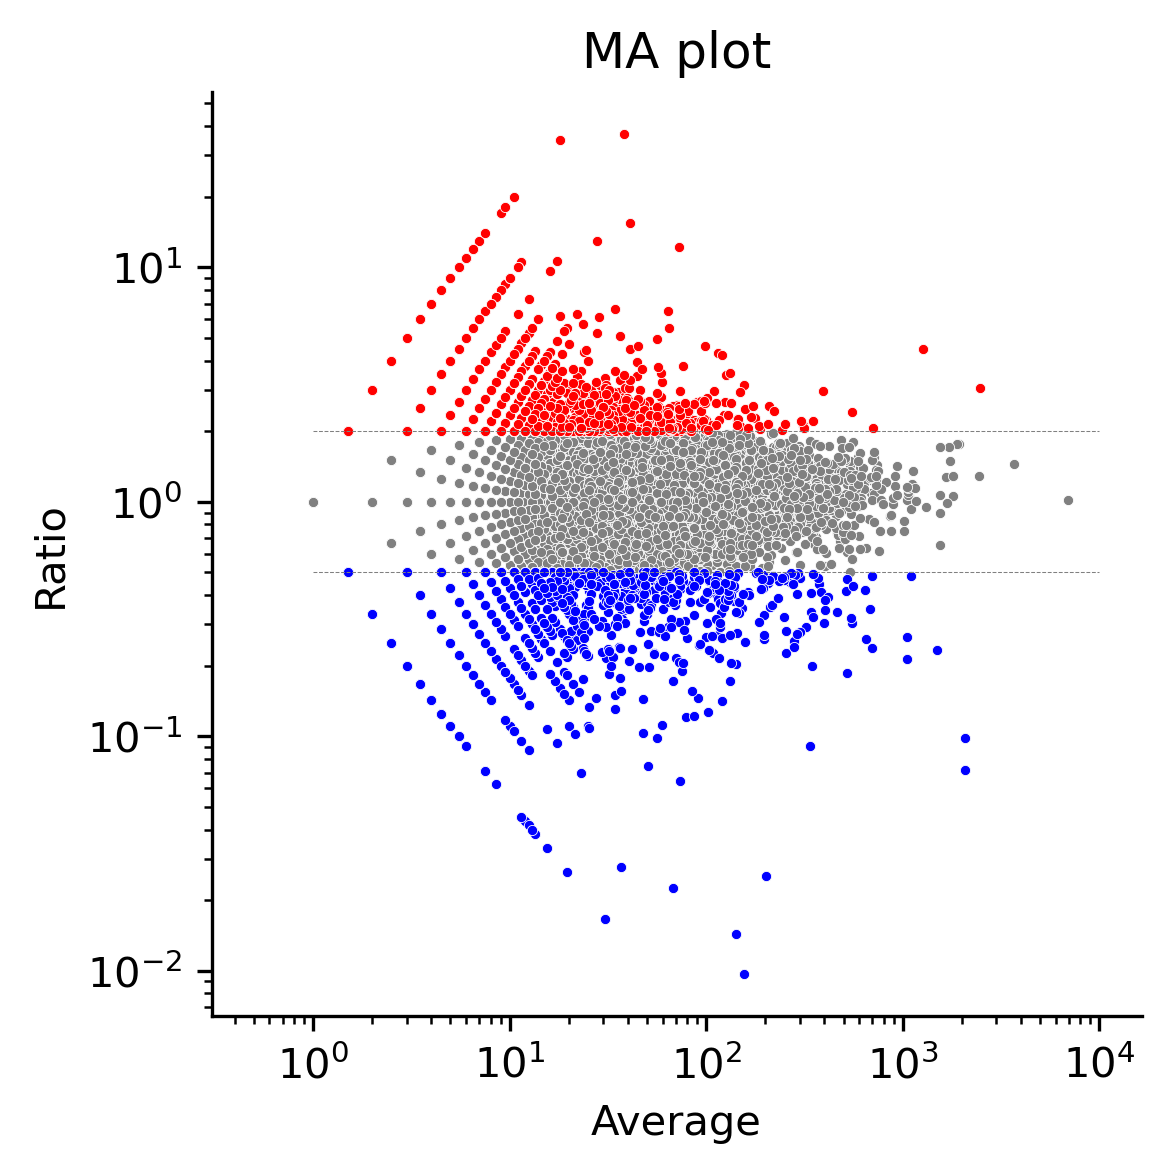

In [46]:
fig, ax = plt.subplots()

sns.lineplot(x=[1, 10000],
             y=[2, 2],
             lw=0.25,
             ls='--',
             c='grey'
            )

sns.lineplot(x=[1, 10000],
             y=[0.5, 0.5],
             lw=0.25,
             ls='--',
             c='grey'
            )

sns.scatterplot(x=just_counts['avg'],
                y=just_counts['ratio'],
                c='grey',
                s=6
               )

sns.scatterplot(x=upreg['avg'],
                y=upreg['ratio'],
                c='r',
                s=6
               )

sns.scatterplot(x=downreg['avg'],
                y=downreg['ratio'],
                c='b',
                s=6
               )

plt.loglog()
plt.title('MA plot')
plt.xlabel('Average')
plt.ylabel('Ratio')
sns.despine()

fig.set_dpi(300)
fig.set_size_inches(4,4)

<h1 style="font-size: 40px; margin-bottom: 0px;">References</h1>

<hr style="margin-left: 0px; border: 0.25px solid; border-color: #000000; width: 400px;"></hr>

<a href="https://academic.oup.com/bioinformatics/article/31/2/166/2366196" rel="noopener noreferrer" target="_blank"><u>Anders et al 2015 Bioinformatics:</u></a> HTSeq—a Python framework to work with high-throughput sequencing data

<a href="https://academic.oup.com/bioinformatics/article/38/10/2943/6551247" rel="noopener noreferrer" target="_blank"><u>Putri et al 2022 Bioinformatics:</u></a> Analysing high-throughput sequencing data in Python with HTSeq 2.0

<a href="https://academic.oup.com/bib/article/20/6/2044/5066173" rel="noopener noreferrer" target="_blank"><u>McDermaid et al 2019 Brief Bioinform:</u></a> Interpretation of differential gene expression results of RNA-seq data: review and integration